# Chapter 2:

## Practical's - Deep Learning for Coders with Fastai and Pytorch
First is to download the bear dataset

## Downloading Bear Images from Google Image Search 

In [8]:
import os
import requests # conda or pip install requests #to sent GET requests on google
from bs4 import BeautifulSoup # conda or pip install bs4 #to parse html(getting data out from html, xml or other markup languages)

# user can input a search keyword and the count of images required
# download images from google search image
Google_Image = 'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'

# The User-Agent request header contains a characteristic string 
# that allows the network protocol peers to identify the application type, 
# operating system, and software version of the requesting software user agent.
# needed for google search
# it is found by typing 'my user agent' in a google browser's search box to get your browser user agent details
# and replace it in the code below. Leave the rest of code intact/unchanged.
u_agnt = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
}

Image_Folder = 'bears' # creating the main folder

def main():
    if not os.path.exists(Image_Folder):
        os.mkdir(Image_Folder)
    download_images()


def download_images():
    #Creating a list of our search keywords
    datas = []
    while True:
        data = input('Enter your search keyword and q to quite: ')
        if data == 'q':
            break
        datas.append(data)

    #Capture the number of images for each keyword search
    num_images = int(input('Enter the number of images you are searching for each keyword search: '))

    print(f'Searching Images for . . . {datas} \n') #prints a list of all keyword search

    for data in datas:
        search_url = Google_Image + 'q=' + data # adding 'q=' to url because its a query

        # request url, without u_agnt the permission gets denied
        response = requests.get(search_url, headers=u_agnt)
        html = response.text #To get actual result i.e. to read the html data in text mode

        # find all img where class='rg_i Q4LuWd'
        b_soup = BeautifulSoup(html, 'html.parser') #html.parser is used to parse/extract features from HTML files
        results = b_soup.findAll('img', {'class': 'rg_i Q4LuWd'})

        #extract the links of requested number of images with 'data-src' attribute and appended those links to a list 'imagelinks'
        #allow to continue the loop in case query fails for non-data-src attributes

        count = 0
        imagelinks = []
        for res in results:
            try:
                link = res['data-src']
                imagelinks.append(link)
                count = count + 1
                if (count >= num_images):
                    break

            except KeyError:
                continue

        print(f'Found {len(imagelinks)} images of ' + data)

        #Downloading images
        print(f'Start downloading images of ' + data + ' ...')
        
        # Creating a subfolder in the main folder
        Image_Subfolder = data
        if not os.path.exists(os.path.join(Image_Folder, Image_Subfolder)):
            os.mkdir(os.path.join(Image_Folder, Image_Subfolder)) 
        
        for i, imagelink in enumerate(imagelinks):
        # open each image link and save the file
            response = requests.get(imagelink)
            imagename = Image_Folder + '/' + Image_Subfolder + '/' + data + str(i+1) + '.jpg'
            with open(imagename, 'wb') as file:
                file.write(response.content)

        print(f'Downloading ' + data + ' is completed!\n')
        

if __name__ == '__main__':
    main()

Enter your search keyword and q to quite: black bear
Enter your search keyword and q to quite: grizzly bear
Enter your search keyword and q to quite: teddy bear
Enter your search keyword and q to quite: q
Enter the number of images you are searching for each keyword search: 150
Searching Images for . . . ['black bear', 'grizzly bear', 'teddy bear'] 
Found 80 images of black bear
Start downloading images of black bear ...

Found 80 images of grizzly bear
Start downloading images of grizzly bear ...

Found 80 images of teddy bear
Start downloading images of teddy bear ...



In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision.all import *
from fastai.metrics import error_rate
from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload

In [3]:
#Identifying the folder path to image links 
path = Path('bears')

In [4]:
#Checking if our folders have images
fns = get_image_files(path)
fns

(#240) [Path('bears/black bear/black bear1.jpg'),Path('bears/black bear/black bear10.jpg'),Path('bears/black bear/black bear11.jpg'),Path('bears/black bear/black bear12.jpg'),Path('bears/black bear/black bear13.jpg'),Path('bears/black bear/black bear14.jpg'),Path('bears/black bear/black bear15.jpg'),Path('bears/black bear/black bear16.jpg'),Path('bears/black bear/black bear17.jpg'),Path('bears/black bear/black bear18.jpg')...]

In [5]:
failed = verify_images(fns)
failed

(#0) []

if you have failed images, you can use the unlink function to remove them as follows:

failed.map(Path.unlink);

Getting help on functions
use double quesion marks E.g: ??verify_images

# DataLoaders
After downloading the data, we need to perpare it for loading in our model by telling fastai what kind of data we are working with, how to get the list of items, how to label this items and how to creat the validation set. This is achieved by customizing fastai's system called "data block API" (DataLoaders Object). DataLoaders provide data to a model.

In [4]:
#This command gives a dataBlock object / templete for creating a DataLoaders
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, item_tfms = Resize(128))

After creating a DataBlock object / a template for creating a DataLoaders.
We still need to tell fastai the actual source of our data —in this case, the path where the images can be found:

In [5]:
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


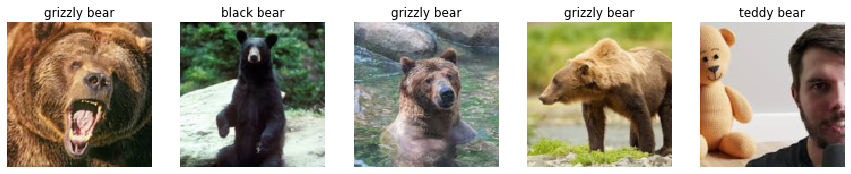

In [6]:
dls.valid.show_batch(max_n=5, nrows=1)
# looking at few items in a tensor (batch) usiing show_batch method on a dataloader

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


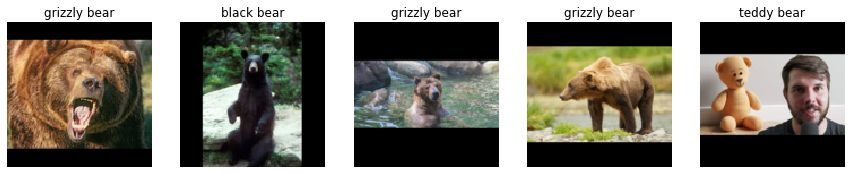

In [7]:
#Making a copy of a DataLoader and adding padding method as item transform
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


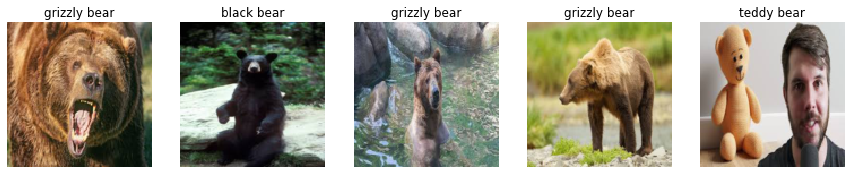

In [8]:
#Making a copy of a DataLoader and applying a Squish method as item transform
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


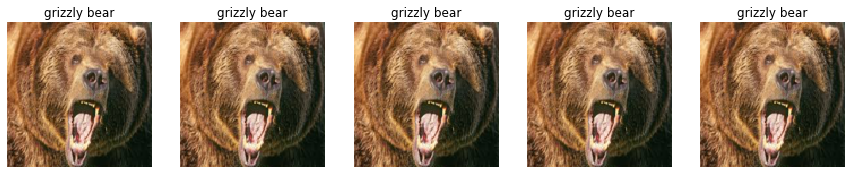

In [14]:
# Making a copy of a DataLoader and applying a RandomResizedCrop method as item transform
# min_scale determins how much of the image to select at minimum each time

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.4))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1, unique=True)

# unique=True to have the same image repeated with different versions of this RandomResizedCrop transform.

# Data Augmentation 

Data augmentation refers to creating random variations of our input data, such that they appear different but do not change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes, and contrast changes.

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


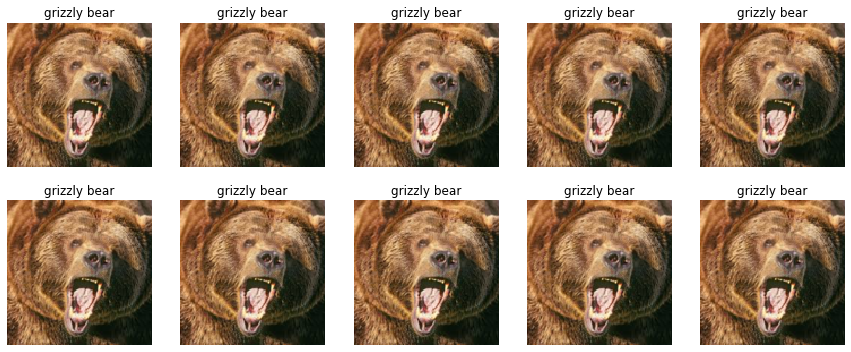

In [16]:
# Making a copy of a DataLoader and applying a aug_transforms function
# Make images be of same size using Resize function
# batch_tfms applies to a whole batch/tensor 
bears = bears.new(item_tfms=Resize(128),
batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2, unique=True)

## Training the Model

In [17]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ERLLAP/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


C:\Users\ERLLAP\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.123834,0.801083,0.333333,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.469084,0.318511,0.125000,02:06
1,0.386528,0.142312,0.062500,02:14
2,0.300370,0.085252,0.062500,02:21
3,0.260308,0.077732,0.062500,02:22


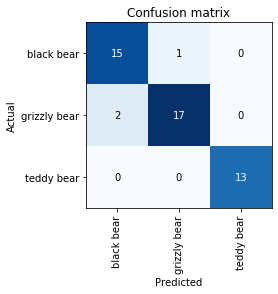

In [18]:
# Creating a confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# The Loss
The loss is a number that is higher if the model is incorrect especially if it’s also confident of its incorrect answer), or if it’s correct but not confident of its correct answer.
plot_top_losses shows us the imageswith the highest loss in our dataset
As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The probability here is the confidence level, from zero to one, that the model has assigned to its prediction:

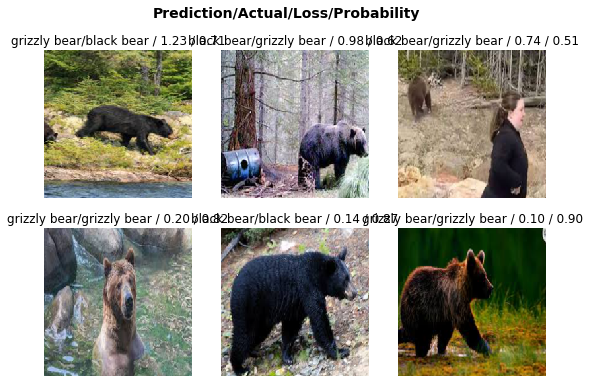

In [22]:
interp.plot_top_losses(6, nrows=2)

This output shows that the image with the highest loss is one that has been predicted as “grizzly” with high confidence. However, it’s labeled (based on our Google image search) as “black.” We’re not bear experts, but it sure looks to us like this label is incorrect! We should probably change its label to “grizzly.”

# Using fastai default tool for cleaning data
ImageClassifierCleaner that allows you to choose a category and the
training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [8]:
cleaner = ImageClassifierCleaner(learn)
cleaner

NameError: name 'ImageClassifierCleaner' is not defined

# Deploying the Model
Turning the model into an Online Application
1. Export the model to save its architecture and parameters (and even its predefined dataloaders)


In [29]:
learn.export()

In [9]:
#Checking whether the exported file exists by using the ls method that fastai adds to Python’s Path class:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [10]:
#Creating inferences from exported file using load_learner

learn_inf = load_learner(path/'export.pkl')#loading learner (not necessary since it is in our notbook - just for learning purposes)
learn_inf.predict('bears/teddy bear/teddy bear56.jpg') # predicting an image

C:\Users\ERLLAP\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


('teddy bear', tensor(2), tensor([1.3796e-07, 1.4540e-07, 1.0000e+00]))

This has returned three things: the predicted category in the same format you
originally provided (in this case, that’s a string), the index of the predicted category,
and the probabilities of each category. The last two are based on the order of
categories in the vocab of the DataLoaders; that is, the stored list of all possible
categories. At inference time, you can access the DataLoaders as an attribute of
the Learner:

In [8]:
learn_inf.dls.vocab # Checking the order of categories in a DataLoaders

['black bear', 'grizzly bear', 'teddy bear']

# Creating a Notebook App from the Model
To use our model in an application, we can simply treat the predict method as a regular function.
To make a working web application using Jupyter notebook we need 
1. Ipython widgets (ipywidgets) - GUI components that bring together JavaScript and Python functionality in a web browser, and can be created and used within a Jupyter notebook. Import widgets to be able to use them

from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload

2. Voila is a system for making applications consisting of IPython widgets available to end users,without them having to use Jupyter at all.


In [11]:
#from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload
#from PIL import Image

# First we need a file upload widget and upload a file
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

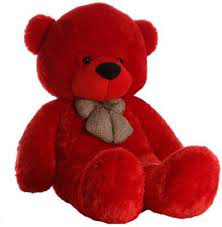

In [12]:
# Now we grab the uploaded file

img = PILImage.create(btn_upload.data[-1])
img

In [13]:
# We use the output widget to display the file

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl:
    display(img.to_thumb(128,128))
out_pl

Output()

In [14]:
#Then we get our predictions for the uploaded model

pred,pred_idx,probs = learn_inf.predict(img)

In [15]:
#And user labels to display the predictions of the image
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy bear; Probability: 1.0000')

In [16]:
# We add a button for doing the classification
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [18]:
# We’ll also need to add a click event handler; that is, 
# a function that will be called when Classify button is clicked
# We can just copy over the previous lines of code

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl = widgets.Output()
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred = widgets.Label()
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
    
btn_run.on_click(on_click_classify) 
# You can test the button now by clicking it, and you should see the image and predictions update automatically!

In [19]:
# We can now put all the widgets in a vertical box (VBox) to complete our GUI:

display(VBox([widgets.Label('Select a Bear to Classify !'),
    btn_upload, btn_run, out_pl, lbl_pred]))

# Turning the Notebook into a Real App

Copy the web application code only to a new jupyter file and run as a web

## End

# Print dependences
Dependences are fundamental to record the computational environment
For example we use watermark to print version of python, ipython, and packages, and characteristics of the computer.

In [7]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p fastai


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.11.1

fastai: 2.5.0

Compiler    : MSC v.1915 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores   : 2
Architecture: 64bit

